**Sobre o conjunto de dados**

Este é um conjunto de dados que requer muito pré-processamento com insights EDA incríveis para uma empresa. Um conjunto de dados que consiste em dados de vendas e lucros classificados por segmento de mercado e país/região.

Importando a base de dados

In [105]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Importando a base de dados
df = pd.read_csv('dados_tratados.csv')

display(df)

,segmento,país,produto,faixa_de_desconto,unidades_vendidas,preço_de_fabricação,preço_de_venda,vendas_brutas,descontos,vendas,cogs,lucro,data,nome_do_mês,ano
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,January,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,January,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,June,2014-01-01
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,June,2014-01-01
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,June,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,March,2014-01-01
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,October,2014-01-01
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,February,2014-01-01
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,April,2014-01-01


Analisando os dados

Análise do segmentos, produtos e países

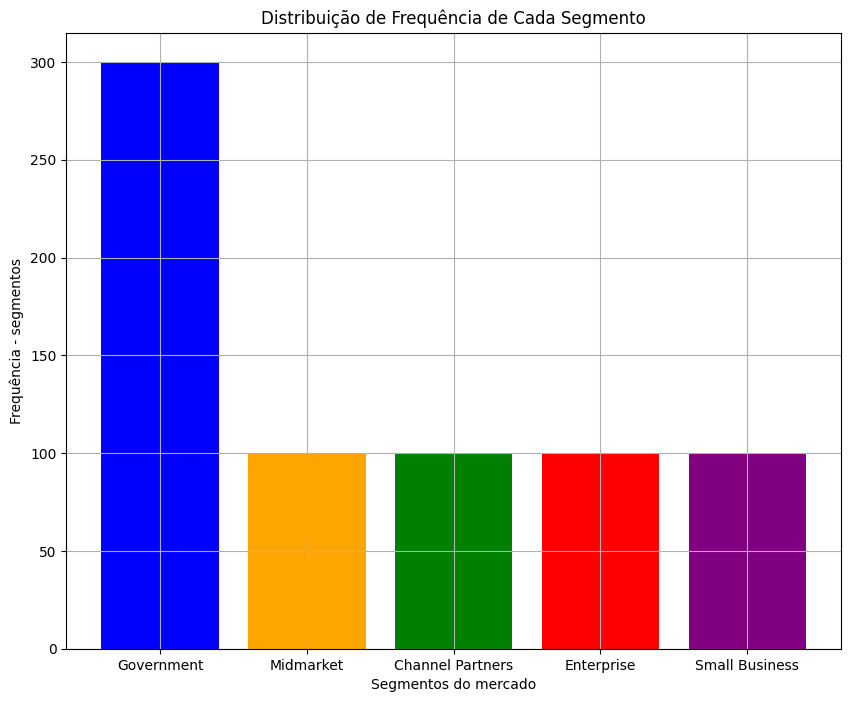

In [107]:
# Verificando os diferentes segmentos presentes no conjunto de dados
segmentos = df['segmento'].value_counts()

# distribuição de frequência de cada segmento
plt.figure(figsize=(10,8))
plt.bar(segmentos.index, segmentos.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Segmentos do mercado')
plt.ylabel('Frequência - segmentos')
plt.title('Distribuição de Frequência de Cada Segmento')
plt.grid(True)
plt.show()


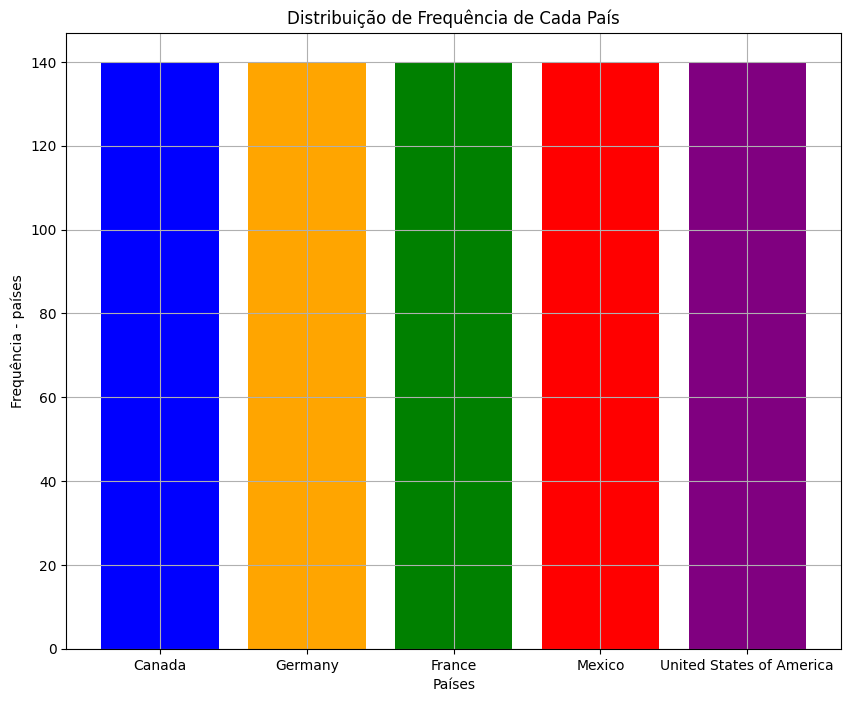

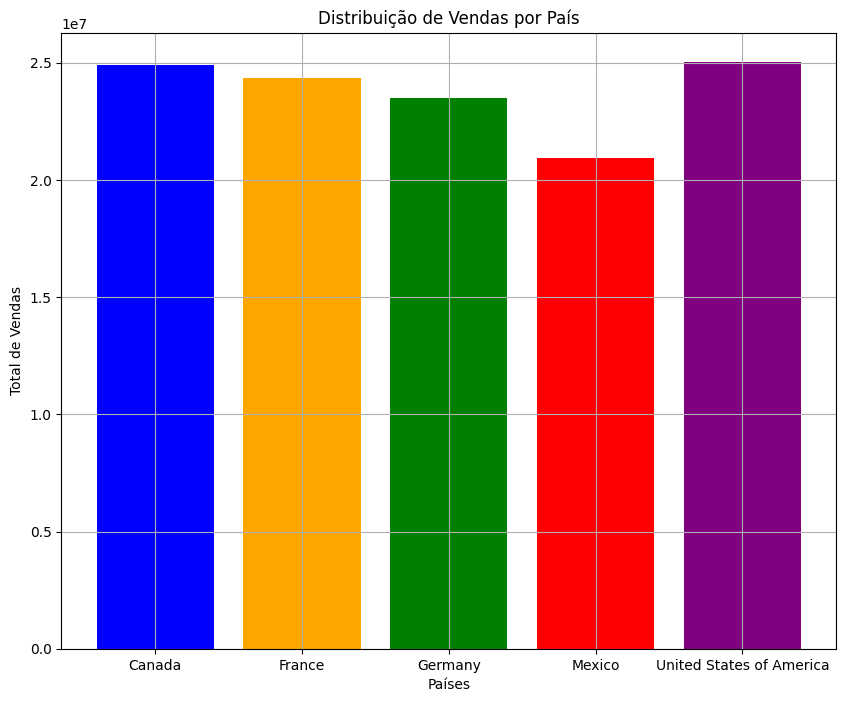

In [108]:
# Analisando  os países representados
pais = df['país'].value_counts()

plt.figure(figsize=(10,8))
plt.bar(pais.index, pais.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Países')
plt.ylabel('Frequência - países')
plt.title('Distribuição de Frequência de Cada País')
plt.grid(True)
plt.show()

# analisando a  distribuição de vendas por país?

vendas_por_pais = df.groupby('país')['vendas'].sum()

plt.figure(figsize=(10, 8))
plt.bar(vendas_por_pais.index, vendas_por_pais.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Países')
plt.ylabel('Total de Vendas')
plt.title('Distribuição de Vendas por País')
plt.grid(True)
plt.show()


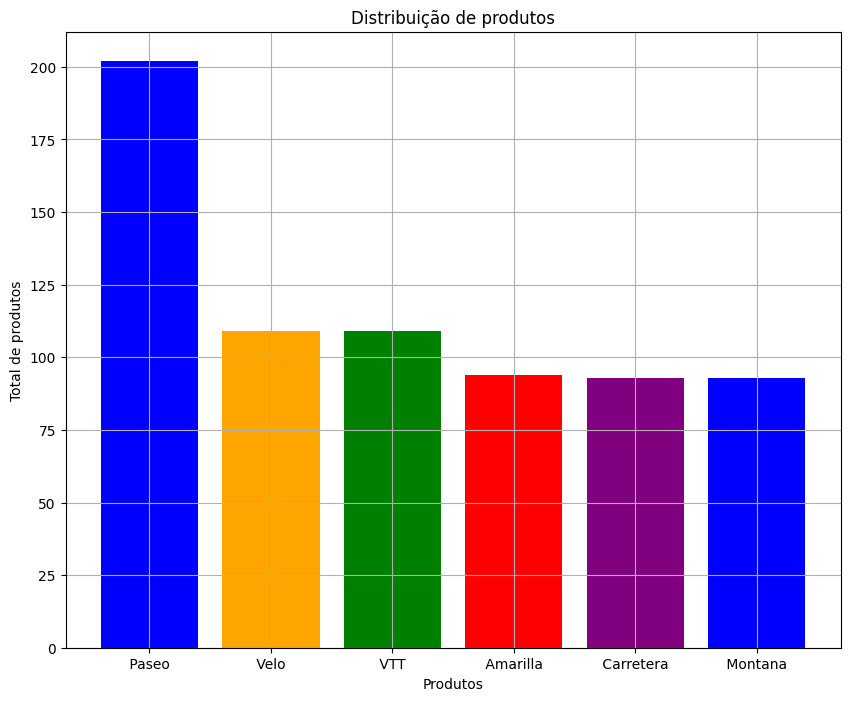

In [109]:
# Verificando os diferentes tipos de produtos

produtos = df['produto'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(produtos.index, produtos.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Produtos')
plt.ylabel('Total de produtos')
plt.title('Distribuição de produtos')
plt.grid(True)
plt.show()

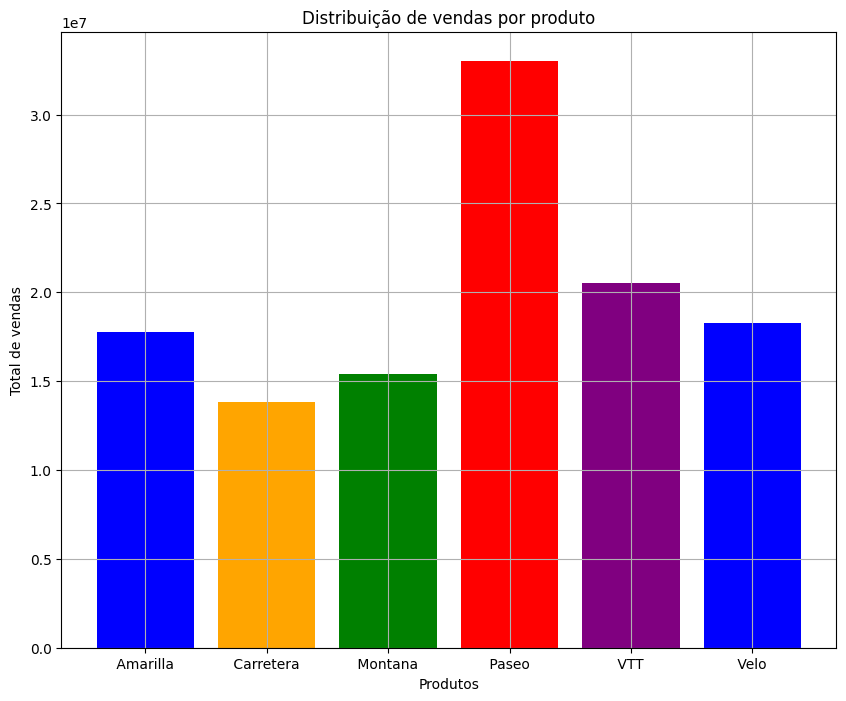

In [110]:
# Analisando a distribuição de vendas por produto

vendas_por_produto = df.groupby('produto')['vendas'].sum()

plt.figure(figsize=(10,8))
plt.bar(vendas_por_produto.index, vendas_por_produto.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Produtos')
plt.ylabel('Total de vendas')
plt.title('Distribuição de vendas por produto')
plt.grid(True)
plt.show()

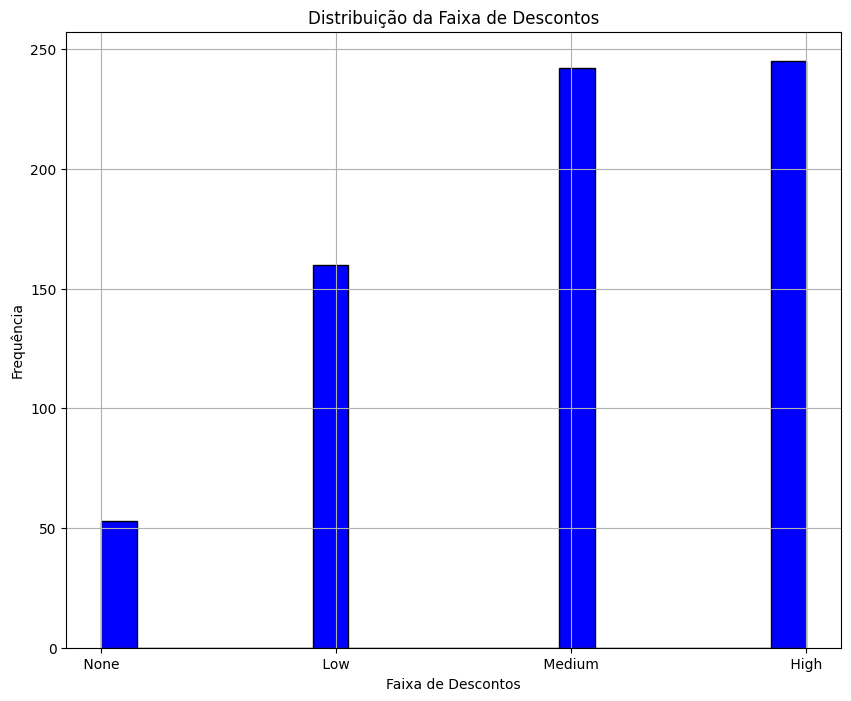

In [111]:
# analisando a faixa de descontos
descricao_desconto = df['faixa_de_desconto'].value_counts()

plt.figure(figsize=(10,8))
plt.hist(df['faixa_de_desconto'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Faixa de Descontos')
plt.ylabel('Frequência')
plt.title('Distribuição da Faixa de Descontos')
plt.grid(True)
plt.show()

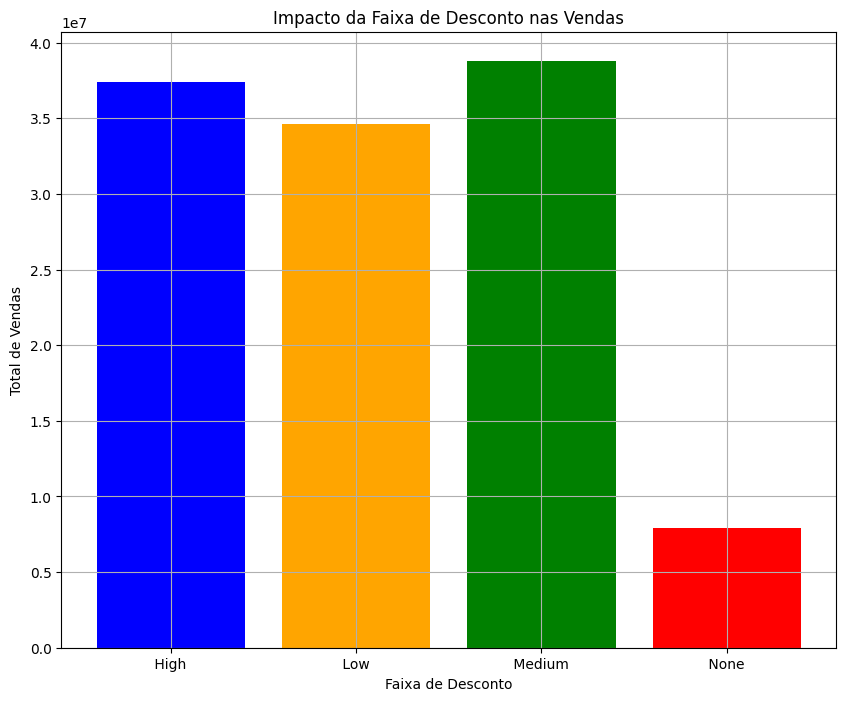

In [112]:
# Analisando o impacto da faixa de desconto nas vendas

faixa_descontos_por_vendas = df.groupby('faixa_de_desconto')['vendas'].sum()

plt.figure(figsize=(10,8))
plt.bar(faixa_descontos_por_vendas.index, faixa_descontos_por_vendas.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Faixa de Desconto')
plt.ylabel('Total de Vendas')
plt.title('Impacto da Faixa de Desconto nas Vendas')
plt.grid(True)
plt.show()

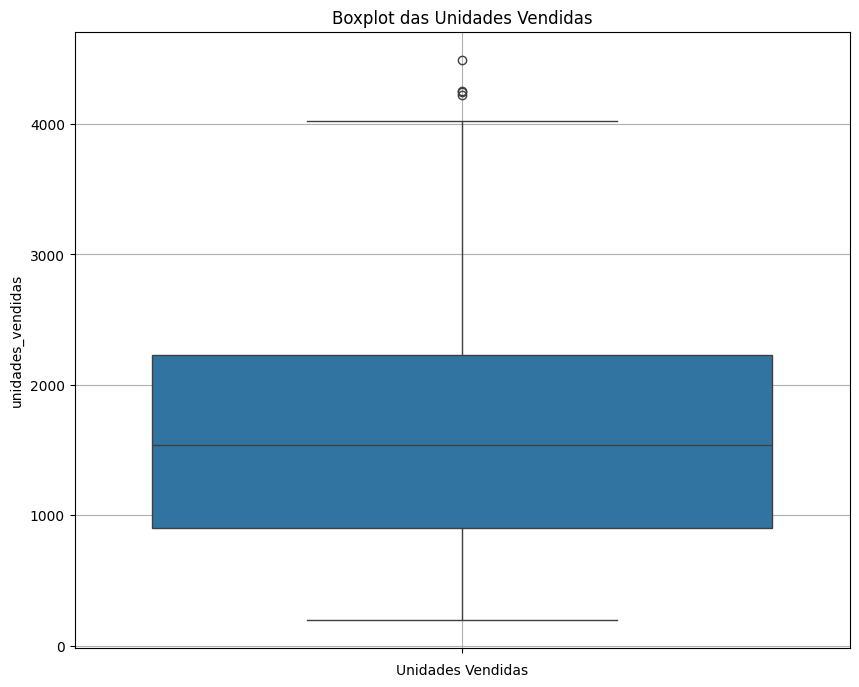

count     700.00
mean     1608.29
std       867.43
min       200.00
25%       905.00
50%      1542.50
75%      2229.12
max      4492.50
Name: unidades_vendidas, dtype: float64

In [113]:
# Analisando média, mediana e desvio padrão das unidades vendidas

unidades_vendidas = df['unidades_vendidas'].describe()

# Criando o boxplot com Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(y=df['unidades_vendidas'])
plt.xlabel('Unidades Vendidas')
plt.title('Boxplot das Unidades Vendidas')
plt.grid(True)
plt.show()


display(round(unidades_vendidas,2))

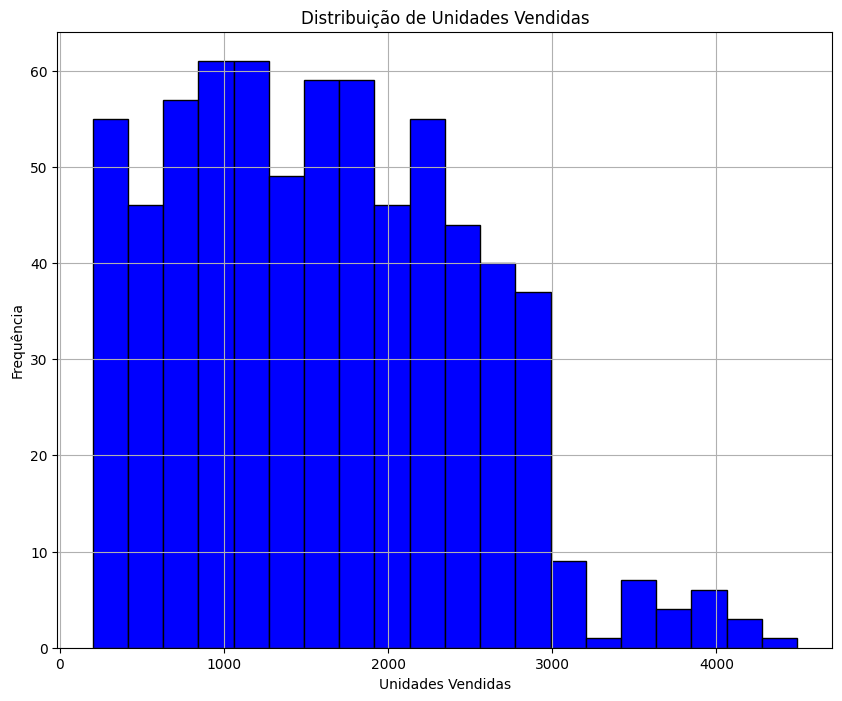

In [114]:
# Analisando a distribuição de unidades vendidas
unidades_vendidas = df['unidades_vendidas']  # Use este se já removeu os outliers

plt.figure(figsize=(10, 8))
plt.hist(unidades_vendidas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')
plt.title('Distribuição de Unidades Vendidas')
plt.grid(True)
plt.show()


In [131]:
# Calculando média, mediana e desvio padrão do preço de fabricação e preço de venda
descricao_preco_fabricacao = df['preço_de_fabricação'].describe()

descricao_preco_venda = df['vendas'].describe()

display(round(descricao_preco_fabricacao,2))
print('---------------------------------------------')
display(round(descricao_preco_venda,2))

count    700.00
mean      96.48
std      108.60
min        3.00
25%        5.00
50%       10.00
75%      250.00
max      260.00
Name: preço_de_fabricação, dtype: float64

---------------------------------------------


count        700.00
mean      169609.07
std       236726.35
min         1655.08
25%        15928.00
50%        35540.20
75%       261077.50
max      1159200.00
Name: vendas, dtype: float64

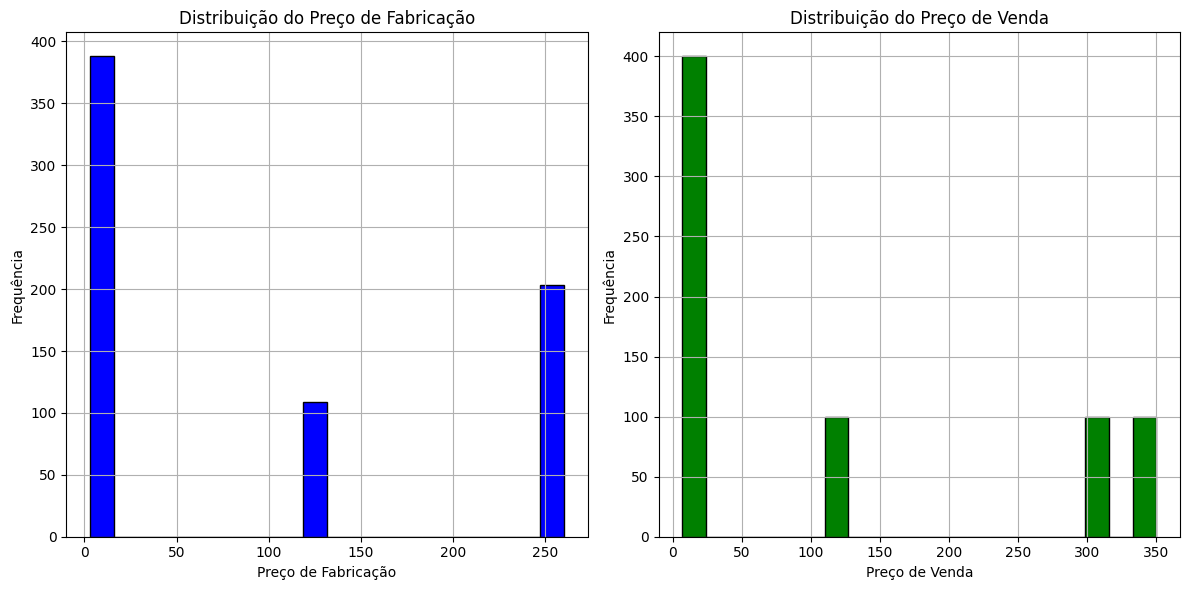

In [116]:
plt.figure(figsize=(12, 6))

# Histograma do Preço de Fabricação
plt.subplot(1, 2, 1)
plt.hist(df['preço_de_fabricação'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Preço de Fabricação')
plt.ylabel('Frequência')
plt.title('Distribuição do Preço de Fabricação')
plt.grid(True)

# Histograma do Preço de Venda
plt.subplot(1, 2, 2)
plt.hist(df['preço_de_venda'], bins=20, color='green', edgecolor='black')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.title('Distribuição do Preço de Venda')
plt.grid(True)

plt.tight_layout()
plt.show()


In [120]:
# Calculando a diferença média entre o preço de venda e o preço de fabricação
df['diferenca_preco'] = df['preço_de_venda'] - df['preço_de_fabricação']
media_diferenca_preco = df['diferenca_preco'].mean()

print(f"Diferença Média entre Preço de Venda e Preço de Fabricação: {media_diferenca_preco}")


Diferença Média entre Preço de Venda e Preço de Fabricação: 21.951428571428572


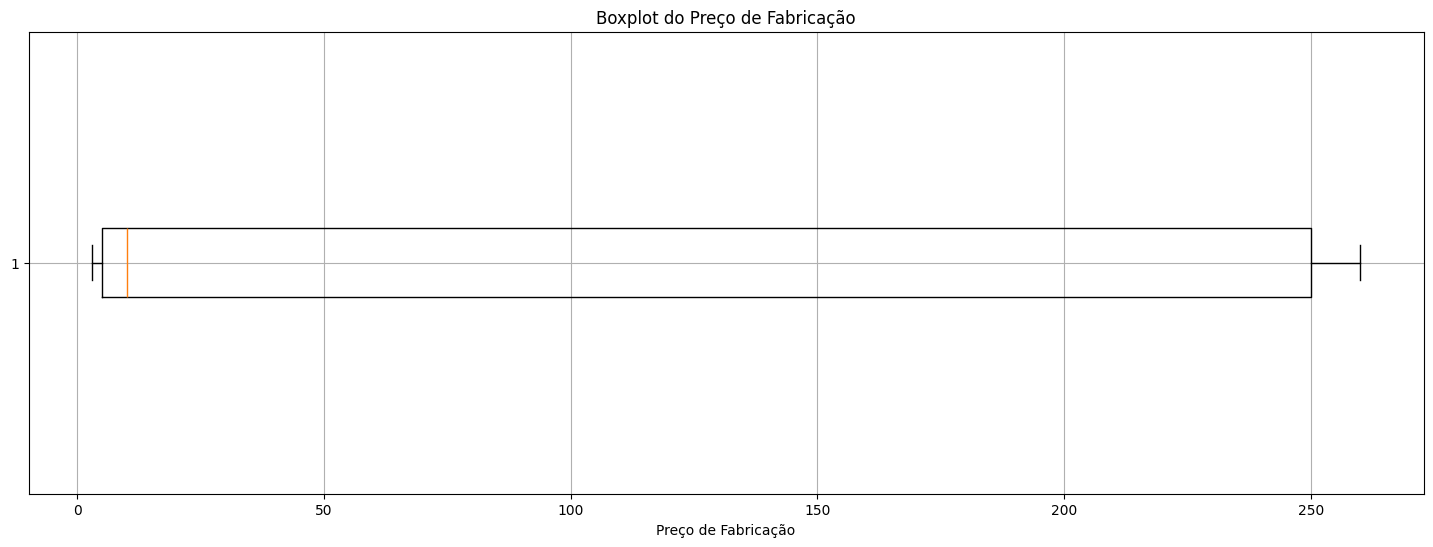

In [126]:
# Verificando a distribuição dos preços
plt.figure(figsize=(18, 6))
plt.boxplot(df['preço_de_fabricação'], vert=False)
plt.xlabel('Preço de Fabricação')
plt.title('Boxplot do Preço de Fabricação')
plt.grid(True)
plt.show()


In [133]:
# Analisando a  média, mediana e desvio padrão das vendas brutas e das vendas

descricao_preco_venda = df['vendas'].describe()
display(round(descricao_preco_venda,2))

print('____________________________________________')

descricao_preco_venda_bruta = df['vendas_brutas'].describe()
display(round(descricao_preco_venda_bruta,2))

count        700.00
mean      169609.07
std       236726.35
min         1655.08
25%        15928.00
50%        35540.20
75%       261077.50
max      1159200.00
Name: vendas, dtype: float64

____________________________________________


count        700.00
mean      182759.43
std       254262.28
min         1799.00
25%        17391.75
50%        37980.00
75%       279025.00
max      1207500.00
Name: vendas_brutas, dtype: float64

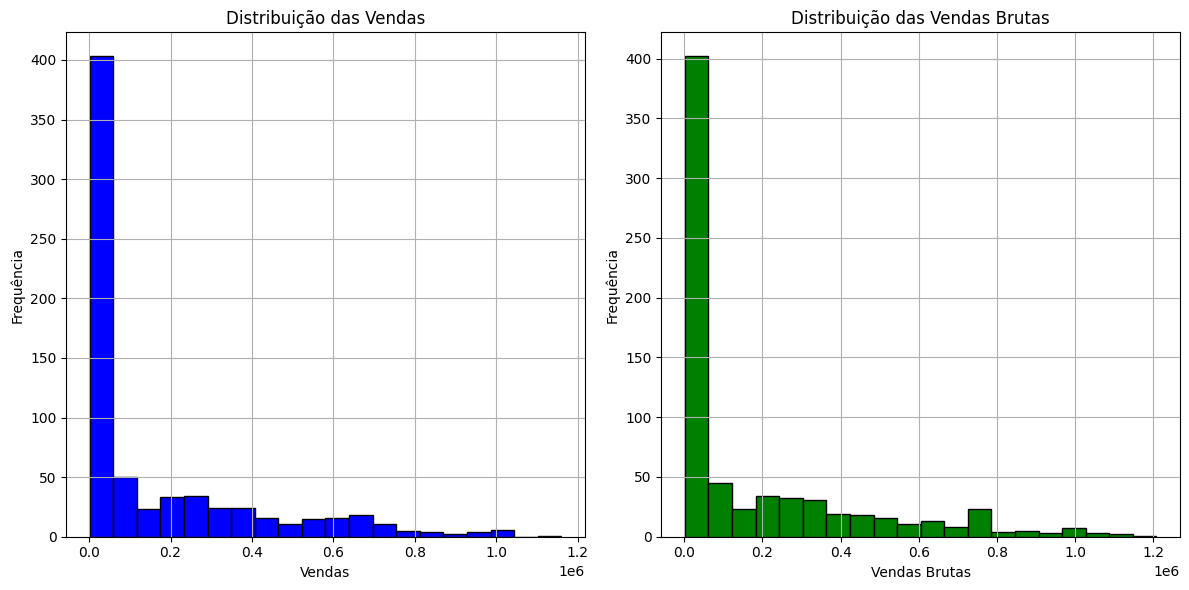

In [138]:
# Analisando a distribuição para vendas e vendas brutas
plt.figure(figsize=(12, 6))

# Histograma das vendas
plt.subplot(1, 2, 1)
plt.hist(df['vendas'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Distribuição das Vendas')
plt.grid(True)

# Histograma das vendas brutas
plt.subplot(1, 2, 2)
plt.hist(df['vendas_brutas'], bins=20, color='green', edgecolor='black')
plt.xlabel('Vendas Brutas')
plt.ylabel('Frequência')
plt.title('Distribuição das Vendas Brutas')
plt.grid(True)

plt.tight_layout()
plt.show()


In [140]:
# Calculando as estatísticas descritivas do COGS
descricao_cogs = df['cogs'].describe()
display(round(descricao_cogs,2))

count       700.00
mean     145475.21
std      203865.51
min         918.00
25%        7490.00
50%       22506.25
75%      245607.50
max      950625.00
Name: cogs, dtype: float64

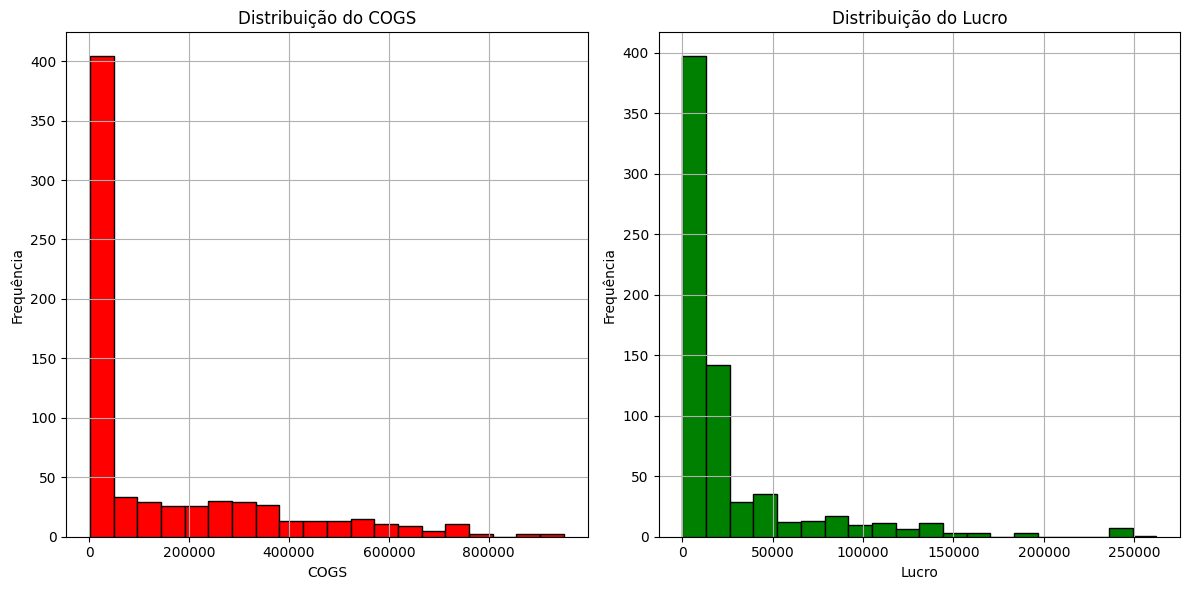

In [141]:
plt.figure(figsize=(12, 6))

# Histograma do COGS
plt.subplot(1, 2, 1)
plt.hist(df['cogs'], bins=20, color='red', edgecolor='black')
plt.xlabel('COGS')
plt.ylabel('Frequência')
plt.title('Distribuição do COGS')
plt.grid(True)

# Histograma do lucro
plt.subplot(1, 2, 2)
plt.hist(df['lucro'], bins=20, color='green', edgecolor='black')
plt.xlabel('Lucro')
plt.ylabel('Frequência')
plt.title('Distribuição do Lucro')
plt.grid(True)

plt.tight_layout()
plt.show()


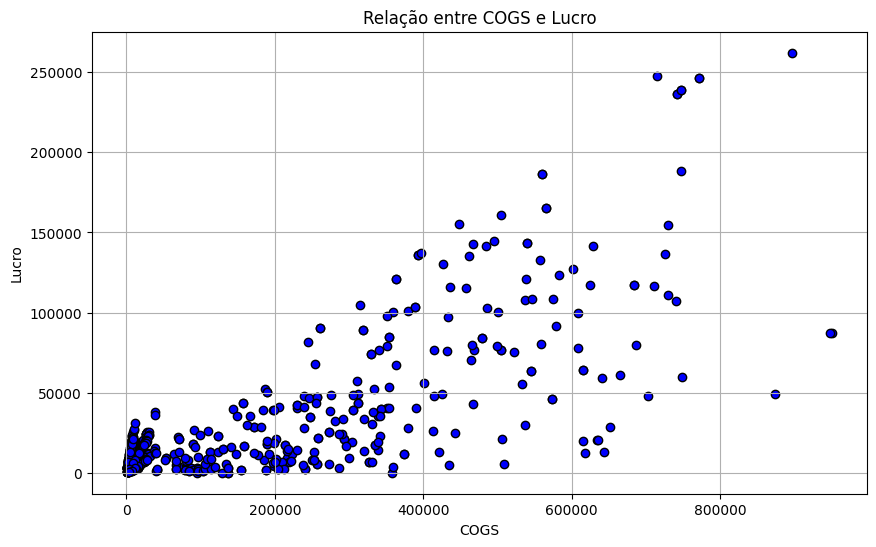

In [142]:
# Relação entre o cogs e o lucro 
plt.figure(figsize=(10, 6))
plt.scatter(df['cogs'], df['lucro'], color='blue', edgecolor='black')
plt.xlabel('COGS')
plt.ylabel('Lucro')
plt.title('Relação entre COGS e Lucro')
plt.grid(True)
plt.show()


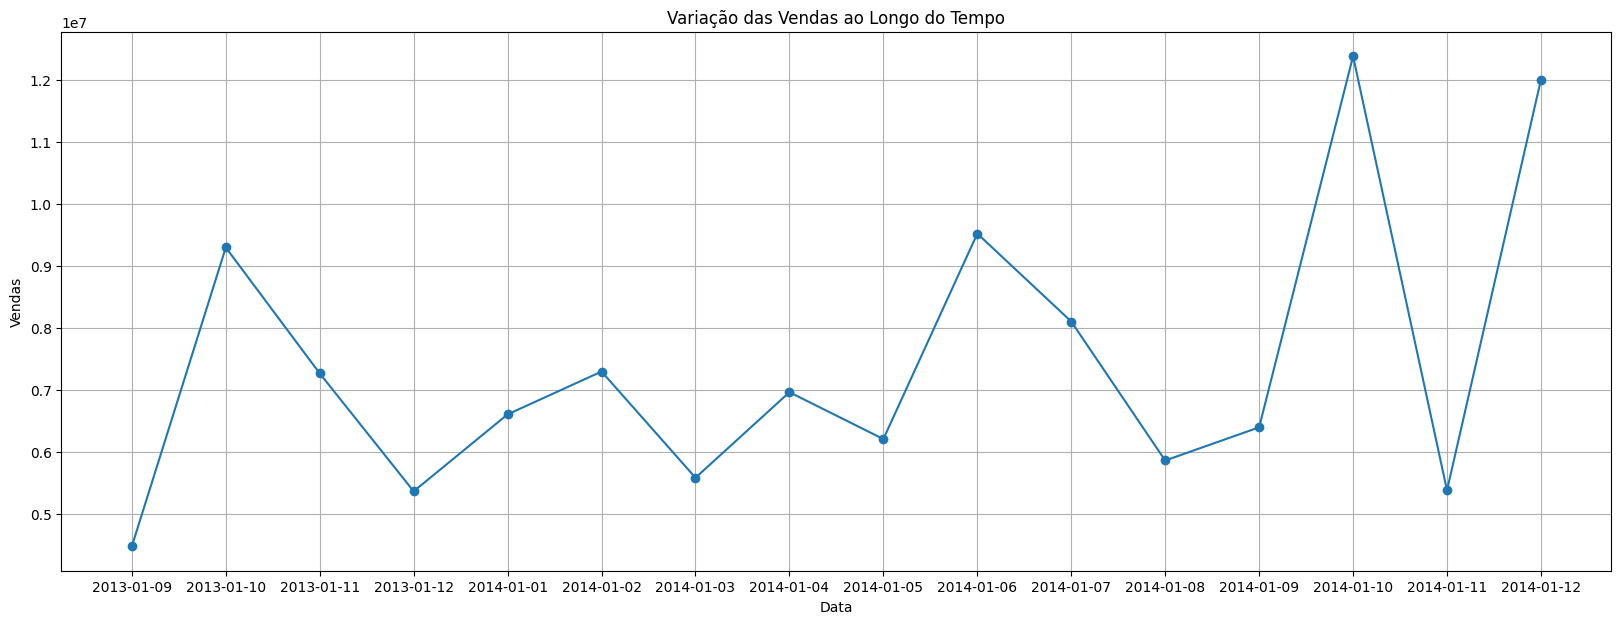

In [144]:
# Análise temporal

# Agregando as vendas por data
vendas_por_data = df.groupby('data')['vendas'].sum()

plt.figure(figsize=(20, 7))
plt.plot(vendas_por_data.index, vendas_por_data.values, marker='o', linestyle='-')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Variação das Vendas ao Longo do Tempo')
plt.grid(True)
plt.show()


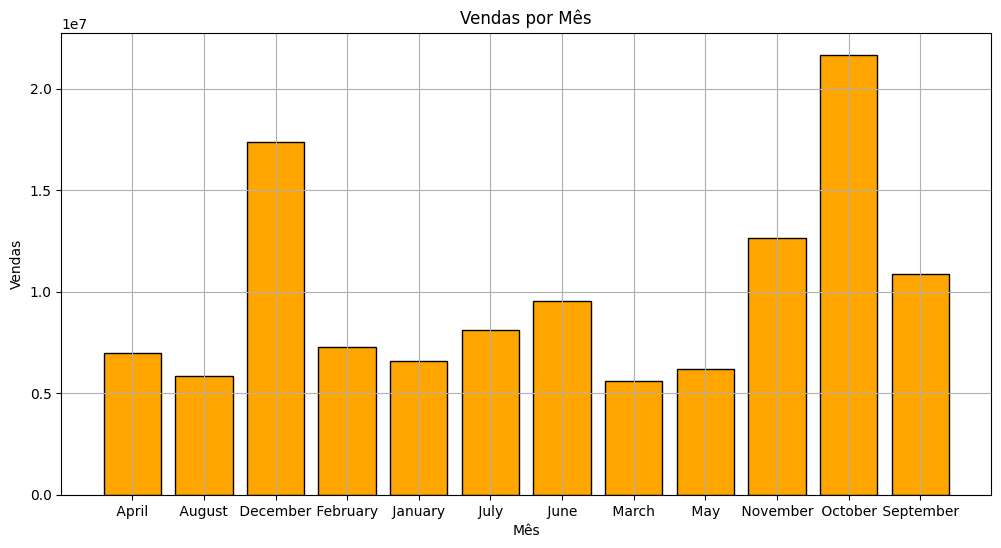

In [145]:
# Agregando as vendas por mês
vendas_por_mes = df.groupby('nome_do_mês')['vendas'].sum()

plt.figure(figsize=(12, 6))
plt.bar(vendas_por_mes.index, vendas_por_mes.values, color='orange', edgecolor='black')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas por Mês')
plt.grid(True)
plt.show()


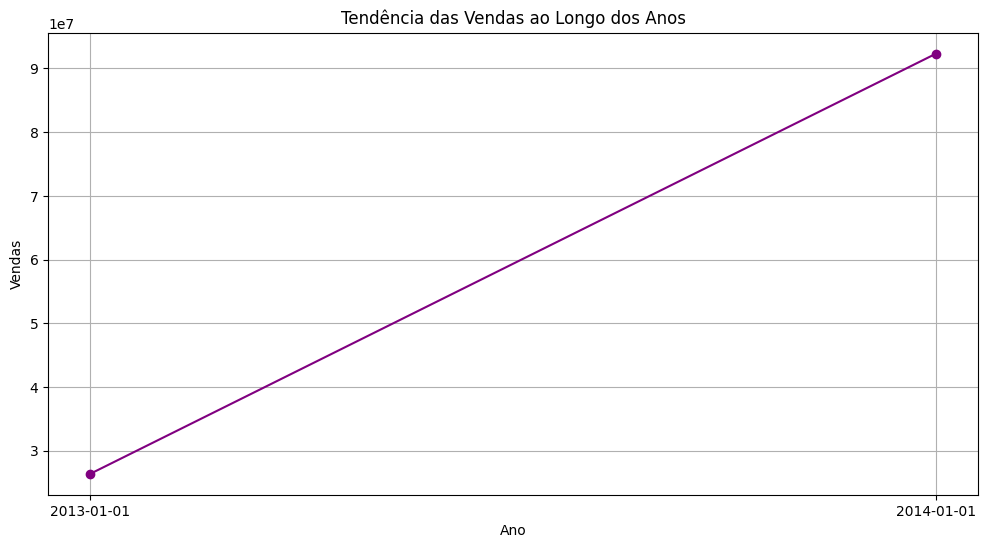

In [146]:
# Agregando as vendas por ano
vendas_por_ano = df.groupby('ano')['vendas'].sum()

plt.figure(figsize=(12, 6))
plt.plot(vendas_por_ano.index, vendas_por_ano.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.title('Tendência das Vendas ao Longo dos Anos')
plt.grid(True)
plt.show()


**Conclusão**

**1. Visão Geral dos Dados**

Tamanho e Tipo de Dados: O conjunto de dados contém 700 registros e 16 colunas, com tipos de dados variados, incluindo variáveis qualitativas e quantitativas.
Valores Ausentes: Foram identificados valores ausentes na coluna de descontos, os quais foram substituídos por 0 para manter a integridade da análise.

**2. Análise de Variáveis Qualitativas**

Segmento: A análise revelou que os segmentos estão bem distribuídos, com alguns segmentos apresentando maior volume de vendas.
País: As vendas são amplamente distribuídas entre diferentes países, com alguns países representando uma maior proporção do total de vendas.
Produto: A distribuição de vendas por produto mostrou que alguns produtos são significativamente mais populares que outros.

**3. Análise de Variáveis Quantitativas**

Faixa de Desconto: A faixa de desconto mostrou uma distribuição relativamente uniforme, com uma média que sugere uma política de descontos moderada.
Unidades Vendidas: As unidades vendidas apresentaram uma média de aproximadamente 1608 unidades, com um desvio padrão indicando variação significativa nas vendas.
Preço de Fabricação e Preço de Venda: O preço de fabricação e o preço de venda mostraram uma ampla faixa de valores, com preços de venda geralmente sendo mais altos que os preços de fabricação, como esperado.
Descontos: A análise dos descontos mostrou que, em média, os descontos aplicados são moderados, mas há variação significativa entre as transações.
COGS e Lucro: O custo das mercadorias vendidas (COGS) e o lucro também mostraram variação significativa, com o lucro tendo uma distribuição mais concentrada em torno de um valor médio específico.

**4. Análise Temporal**

Variação ao Longo do Tempo: As vendas mostraram variação significativa ao longo do tempo, com alguns meses e anos apresentando maiores volumes de vendas.
Tendência de Vendas: Há uma tendência observável nas vendas ao longo dos anos, indicando um possível crescimento ou sazonalidade nas vendas.
Implicações
Segmentação de Mercado: A análise de segmentos e países pode ajudar a direcionar esforços de marketing e vendas para segmentos e regiões mais lucrativos.
Gestão de Estoque: Entender a distribuição das unidades vendidas e os padrões de demanda ao longo do tempo pode ajudar na otimização do estoque.
Política de Preços e Descontos: A análise dos preços de fabricação, preços de venda e descontos pode informar decisões sobre políticas de preços e estratégias promocionais.